# Scikit-Learn: Classification and Regression Models & Examples

This notebook will explore various classification and regression techniques available through the scikit-learn python library. The techniques covered in this notebook are:
- Nearest neighbor (NN)
- Naive Bayes
- Logistic regression
- Support vector machines (SVM)
- Decision trees/random forrest

The dataset that we will use are the MNIST handwritten digits

In [1]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

############################################################
# Load and organize our MNIST handwritten digit image data #
############################################################

data = datasets.load_digits()
images = data.images
targets = data.target

# Split into train and test sets
images_train, images_test, imlabels_train, imlabels_test = train_test_split(images, targets, test_size=.2, shuffle=False)



# Re-shape data so that it's 2D
images_train = np.reshape(images_train, (np.shape(images_train)[0], 64))
images_test = np.reshape(images_test, (np.shape(images_test)[0], 64))

print(f"\nMNIST data sizes:")
print(f"\timages_train: {np.shape(images_train)}")
print(f"\timlabels_train: {np.shape(imlabels_train)}")
print(f"\timages_test: {np.shape(images_test)}")
print(f"\timlabels_test: {np.shape(imlabels_test)}\n\n")

# Plot one of the digits 
image = np.asarray(images[2]).squeeze()
plt.imshow(image)
plt.show()
print(f"This is a number {targets[2]} from the MNIST data set")

##############################################################################
# Now for our Boston house pricing data (for use in the regression problems) #
##############################################################################

features, price = datasets.load_boston(return_X_y=True)

features_train, features_test, prices_train, prices_test = train_test_split(features, price, test_size=.2, shuffle=False)



# No need to reshape the data below because it was never 2D

print(f"\n\nBoston data sizes:")
print(f"\tfeatures_train: {np.shape(features_train)}")
print(f"\tprices_train: {np.shape(prices_train)}")
print(f"\tfeatures_test: {np.shape(features_test)}")
print(f"\tprices_test: {np.shape(prices_test)}")

print(datasets.load_boston().DESCR)


MNIST data sizes:
	images_train: (1437, 64)
	imlabels_train: (1437,)
	images_test: (360, 64)
	imlabels_test: (360,)




<Figure size 640x480 with 1 Axes>

This is a number 2 from the MNIST data set


Boston data sizes:
	features_train: (404, 13)
	prices_train: (404,)
	features_test: (102, 13)
	prices_test: (102,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston e

## I. Nearest Neighbor Algorithm

The nearest neighbor algorithm is one of the more basic classification techniques, and in some cases is actually used as a building block in other richer machine learning algorithms. It's simplicity, in some regard, is where it's power lies: it's fast to implement, and easy to understand. The algorithm looks at the Euclidean distance of given data point to it's nearest neighboring data points to help us gain an understanding of the information contained in the data point of interest. Data points with "closer" Euclidean distances are more likely to be similar than ones whose Euclidean distances are quite far. 

The nearest neighbor algorithm can come in a few different flavors.

- **unsupervised**: we don't know the label of any of the neighboring data points

- **supervised**: we do know the label of the neighboring data points

    - **classification**: the data has a discrete and finite number of values it can take. In supervised nearest neighbor classification, we are typically aiming to predict the class of some data by taking a "vote" of the neighboring pixels. Which ever class receives the most votes, we classify our data as such
    
    - **regression**: the data can take any infinite number of values. In this scenario, we usually take an average of the values of the nearest neighbors
    
- **radius v.s. k-nearest neighbors**: this determines whether we are looking at a fixed number of neighbors, or all neighbors who are within a fixed distance


Let's pick a sample image to plot the 9 nearest neighbors of it, so that we can get a feel for the ```neighbors``` interface and how we would use unsupervised learning to get a feel for our data, without actually know which labels the data corresponds to. 

Text(0.5, 1.0, 'This is a number 7')

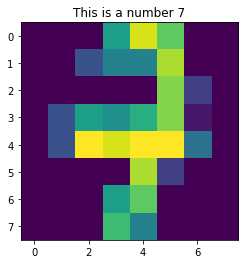

In [2]:
# Display a digit in the training set
seed = 43
random_digit = images_train[seed] # get an image from out training images
random_digit_label = imlabels_train[seed] # get it's corresponding label

#Plot the image and display it's label
fig = plt.figure()
plt.imshow(random_digit.reshape(8,8))
plt.title(f"This is a number {random_digit_label}")


Now we can import ```NearestNeighbors```, which is the interface required when we are detecting nearest neighbors without their labels (ie. unsupervised)

The key input parameters for the ```NearestNeighbors``` constructor is as follows:
```NearestNeighbors(n_neighbors, algorithm).fit(data)```

- ```n_neighbors```: number of neighbors we want to find, default: 5. You can also use ```radius``` instead to specify a radius instead of number of neighbors
- ```algorithm```: which algorithm to use to search for the neighbors. Valid parameter values are ```auto```, ```ball_tree```, ```kd_tree```, ```brute```. Default is ```auto```, and that's what we will use in this notebook. The two tree searches are more efficient in certain scenarios which are beyond the scope of this notebook, so we'll let ```auto``` figure it out for us
- ```.fit(data)```: the data set which will be used to find the nearest neighbors within

After fitting the ```NearestNeighbors``` object to our dataset, we can call the object's ```.kneighbors``` method to specify the point who's neighbors we'd like to find, in our case the point ```random_digit```. This method will return two lists: one for the distances of the neighbors, and one for the indices in the neighbors in the input data that we ```.fit()``` our model to.

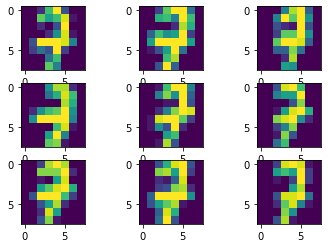

In [3]:
from sklearn.neighbors import NearestNeighbors

# Initialize our neighbors object
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(images_train)
# return the distances and indices of the neighbors nearest to seed
distances, indices = nbrs.kneighbors(images_train[seed].reshape((1,-1)))

# Plot the 9 nearest neighbors
fig = plt.figure()
for i in range(1,10):
    img = np.reshape(images_train[indices[0][i], :], (8,8))
    fig.add_subplot(3, 3, i)
    plt.imshow(img)
plt.show()

### KNN classifier

Let's use the supervised classifier, KNeighborsClassifier, to get a feel for how all of this works. 

In [4]:
from sklearn.neighbors import KNeighborsClassifier

nbrs_k = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto').fit(images_train, imlabels_train)
prediction = nbrs_k.predict(images_train[seed].reshape(1,-1))
print(f"Predicted class: {prediction[0]}")
print(f"Actual class: {imlabels_train[seed]}")

# See if there were any other digits the algorithm thought it could be
print(f"Probability of each class for this example: {nbrs_k.predict_proba(images_train[seed].reshape(1,-1))[0]}\n\n")

# Now lets do this for each data in our test set, to see how accurate KNN classifier can be
nbrs_k = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto').fit(images_test, imlabels_test)

# We'll also run a weighted version to see how much this helps (if at all)
nbrs_k_weighted = KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='auto').fit(images_test, imlabels_test) 

# Some variables to help keep track of how we're doing
number_correct = 0
number_correct_weighted = 0

# Loop over all 
for index_test in range(len(imlabels_test)):
    
    prediction = nbrs_k.predict(images_test[index_test].reshape(1,-1))
    if prediction[0] == imlabels_test[index_test]:
        number_correct += 1
    
    prediction_weighted = nbrs_k_weighted.predict(images_test[index_test].reshape(1,-1))
    if prediction_weighted[0] == imlabels_test[index_test]:
        number_correct_weighted += 1
print("Results from running this on all test data...")
print(f"\tPercent correct for all test data: {100*number_correct/len(imlabels_test)}%")
print(f"\tPercent correct for all test data (weighted): {100*number_correct_weighted/len(imlabels_test)}%")

Predicted class: 7
Actual class: 7
Probability of each class for this example: [0.   0.   0.   0.   0.   0.   0.   0.95 0.   0.05]


Results from running this on all test data...
	Percent correct for all test data: 94.44444444444444%
	Percent correct for all test data (weighted): 100.0%


Wow! Can't beat 100%. Weighting the neighbors by distance ended up working well here, but this is guarunteed to be the case. It could be the case that the closer neighbors just so happen to be the wrong class label, in which case them getting weighted more might be detrimental instead of beneficial.

### KNN Regression

In case we had a dataset where the labels took on continuous values, we could have still used the nearest neighbors algorithm, and instead of invoking ```KNeighborsClassifier```, which predicts data into discrete classes, we could have used ```KNeighborsRegressor```. The regressor works by taking an average of the K nearest data points to predict the value of point of interest. The syntax is exactly the same for the regressor despite the two estimators targetting different applications.


-0.4848311893692361


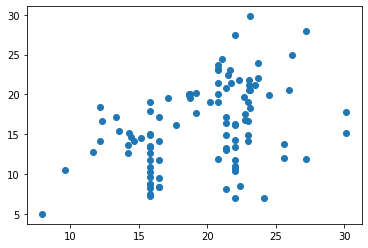

In [5]:
from sklearn.neighbors import KNeighborsRegressor

nbrs_k_regressor = KNeighborsRegressor().fit(features_train, prices_train)

print(nbrs_k_regressor.score(features_test, prices_test))

pred = nbrs_k_regressor.predict(features_test)

fig = plt.figure()
plt.scatter(pred, prices_test)




### KNN Nearest Centroid Classifier

An alternative flavor of the supervised KNN classifier is to use nearest-centroid classification, meaning we will classify a data point as the label of the nearest centroid. Running this classifier is similar as before:

In [6]:
from sklearn.neighbors import NearestCentroid

nbrs_k_centroid = NearestCentroid().fit(images_train, imlabels_train)

number_correct_centroid = 0

# Loop over all 
for index_test in range(len(imlabels_test)):
    
    prediction_centroid = nbrs_k_centroid.predict(images_test[index_test].reshape(1,-1))
    if prediction_centroid[0] == imlabels_test[index_test]:
        number_correct_centroid += 1

print(f"Percent correct for all test data (centroid method): {100*number_correct_centroid/len(imlabels_test)}%")

Percent correct for all test data (centroid method): 85.0%


## 2. Naive Bayes Classifier

Below: multinomial (several classes) is more accurate representation of the distribution than Gaussian (which is for continuous)

In [7]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(images_train, imlabels_train)

number_correct_mnb = 0

for index_test in range(len(imlabels_test)):
    prediction_mnb = mnb.predict(images_test[index_test,:].reshape(1,-1))[0]
    if prediction_mnb == imlabels_test[index_test]:
        number_correct_mnb += 1

print("Naive Bayes Classifier (multinomial distribution)...")
print(f"\tPercent correct for all test data: {100*number_correct_mnb/len(imlabels_test)}%")

Naive Bayes Classifier (multinomial distribution)...
	Percent correct for all test data: 83.33333333333333%


Not quite as accurate on this particular data set as the nearest neighbor classifiers were. Naive Bayes models are simple and hence fast (both to develop and to compute a result), and they work relatively well even in a paucity of training data. Because of the core assumption made about the conditionally indepedent relationship between features, the Naive Bayes method also extends well to high dimensional data with a lot of features; the posterior distribution simply reduces to that many (assumingly) independent posteriors of a single variable. 

$P(x_i | y)$ was taken to be a multinomial distribution above. When that assumption doesn't hold, there are alternative distributions (such as Gaussian, complement, and Bernoulli) in the SciKit-Learn naive_bayes module which still permit the necessary assumptions of conditional independence.

## 3. Logistic Regression


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000,multi_class='multinomial').fit(images_train,imlabels_train)
print(lr.predict(images_test[0,:].reshape(1,-1)))
print(lr.score(images_test, imlabels_test))

[2]
0.9


## 4. Support Vector Machines

The next classifier that we will demonstrate is the method of support vector machines. SVMs provide a sophisticated way of determining decision boundaries by the use of *support vectors*, which are the vectors in the set that anchor the decision boundary and thus would change this boundary if removed. The linear combination of a given sample's features determines whether the SVM will label the sample as one class or the other; 

(the weights of this linear combination are pruned)(?)

Support vector machine classification works as one versus one or one versus all, so for each class we need a set of parameters/coefficients, and then when we try to predict a new data we try all sets of coefficients on it to see which yields the "strongest" results. 

We are interested in finding the weights (for each feature) that will maximize the margin between classes. For a feature $x_i$, we define the positive and negative hyperplanes as 
<br><br>
$$H_+: w \cdot x_i + b = +1$$
$$H_-: w \cdot x_i + b = -1$$
<br>

[not finished]

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm_classifier = SVC(gamma='scale').fit(images_train, imlabels_train)

number_correct_svc = 0
preds = []

for label_index in range(len(imlabels_test)):
    
    pred = svm_classifier.predict(images_test[label_index].reshape(1,-1))
    if pred[0] == imlabels_test[label_index]:
        number_correct_svc += 1
    
    preds.append(pred[0])

print("Support Vector Classifier...")
print(f"\tPercent correct for all test data: {100*number_correct_svc/len(imlabels_test)}%")

confusion_matrix(imlabels_test, preds)

Support Vector Classifier...
	Percent correct for all test data: 94.16666666666667%


array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  6,  1,  0,  0,  1, 31,  1],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  1, 33]], dtype=int64)

0.11234310240423619


(array([ 1.,  2.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  5.,  6.,  9.,  2.,
         7.,  5.,  9., 12.,  4.,  8.,  6.,  7.,  5.,  4.,  3.,  1.,  0.,
         0.,  1.,  0.,  1.]),
 array([-15.3306133 , -14.44763969, -13.56466609, -12.68169249,
        -11.79871889, -10.91574529, -10.03277169,  -9.14979809,
         -8.26682449,  -7.38385088,  -6.50087728,  -5.61790368,
         -4.73493008,  -3.85195648,  -2.96898288,  -2.08600928,
         -1.20303568,  -0.32006207,   0.56291153,   1.44588513,
          2.32885873,   3.21183233,   4.09480593,   4.97777953,
          5.86075313,   6.74372674,   7.62670034,   8.50967394,
          9.39264754,  10.27562114,  11.15859474]),
 <a list of 30 Patch objects>)

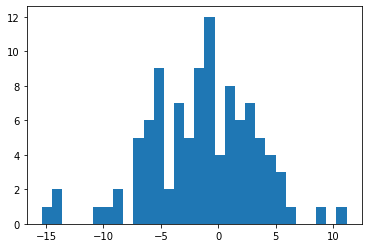

In [16]:
from sklearn.svm import SVR

svm_regressor = SVR(kernel='poly',gamma='scale',degree=1).fit(features_train, prices_train)

preds = svm_regressor.predict(features_test)

print(svm_regressor.score(features_test,prices_test))

fig = plt.figure()
plt.hist(preds-prices_test, bins=30)





## 5. Random Forests



[[34  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  3]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  3  0  0  6  0]
 [ 0  0  0  0 34  0  0  3  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  2  0  0  1  0  0  1 28  1]
 [ 0  0  0  0  0  1  0  0  1 35]]


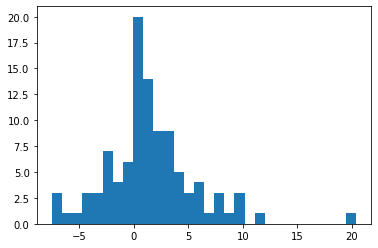

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

print_3_8_mixups = False

rfc = RandomForestClassifier().fit(images_train, imlabels_train)
preds_cl = rfc.predict(images_test)
cnf_mat = confusion_matrix(imlabels_test, preds_cl)
wrong = [(i, preds_cl[i], imlabels_test[i]) for i in range(len(imlabels_test)) if imlabels_test[i] != preds_cl[i]]
print(cnf_mat)

rfr = RandomForestRegressor().fit(features_train, prices_train)
preds_reg = rfr.predict(features_test)

fig = plt.figure()
plt.hist(preds_reg-prices_test, bins=30)


if print_3_8_mixups == True:
    bad_handwriting = [images_test[wrong[i][0]] for i in range(len(wrong)) if wrong[i][2]==3 and wrong[i][1]==8 ]

    for i in range(len(bad_handwriting)):
        fig = plt.figure()
        plt.imshow(bad_handwriting[i].reshape(8,8))

(6, 64)


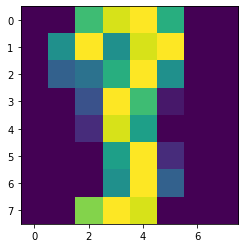

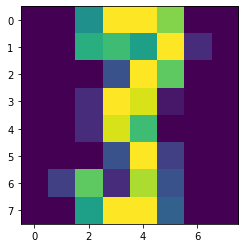

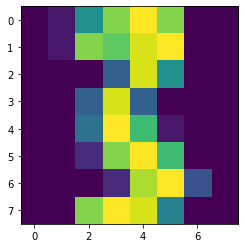

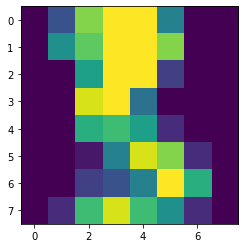

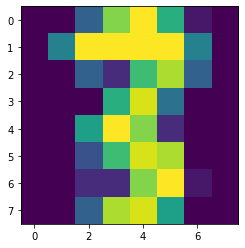

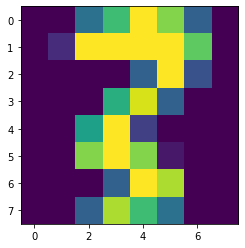

# Grid search and cross validation of model parameters

We have just explored the basic syntax and mechanics of some of Sklearn's common classification and regression algorithms. This is great, but how do we know that the models we have chosen are "good", and how can we tell that the parameters we are using are giving optimal results? Data scientists use cross-validation and grid search for the testing and tuning of their models. These two strategies for model optimization are straight forward, and explained below.

**Cross validation**
In cross validation (CV), we train and test our models with a slightly modified version of train/test split used in the above examples. We first partition the data into a training set and a test set (just as we did originally), but now we will *further* subdivide the **training** set into *k* subsets. Cross validation then proceeds as follows:
1. Remove the first subset $k_0$ from our training set, and train the model with the other *k-1* subsets.
2. Validate the model using $k_0$ to obtain some model accuracy metrics for this test set.
3. Rotate $k_0$ into the training set and $k_1$ into the test set, and perform validation again recording the same accuracy metrics for this test set
4. Keep repeating until all *k* subsets have been used as a test set.
5. Average all of the *k* accuracy metrics obtained to get a performance measure for the model

Cross validation allows us to re-use data when hyperparameter tuning with grid search, while only using every data point in the set once and only once for testing of the model/parameters. 

**Grid Search**
All of the models explored here involve *hyperparameters*, or parameters that the programmer must set in advance of fitting the estimator which can have a great influence on the model's performance. CV can be used in conjuction with grid search techniques to search the hyperparameter space by sweeping over specified ranges of hyperparameter values.

https://scikit-learn.org/stable/modules/grid_search.html#grid-search
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


[Unfinished]